# Exercise: Clustering Algorithms with Scikit Learn
<img src="../Lab/IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [1]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [2]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

## Exercise 1
Plot all raw data sets A-F in one figure.

Hints: use MATPLOTLIB ```scatter``` plots and ```subfigures```.

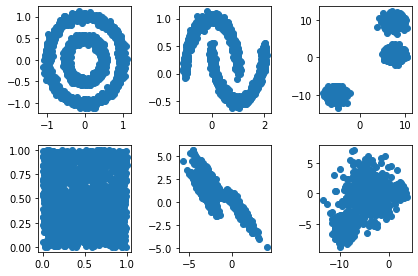

In [3]:
fig, axes = plt.subplots(2, 3)
fig.tight_layout()
axes[0,0].scatter(A[:,0],A[:,1])
axes[0,1].scatter(B[:,0],B[:,1])
axes[0,2].scatter(C[:,0],C[:,1])
axes[1,0].scatter(D[:,0],D[:,1])
axes[1,1].scatter(E[:,0],E[:,1])
axes[1,2].scatter(F[:,0],F[:,1])

## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
* 2.1 plot all results
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 

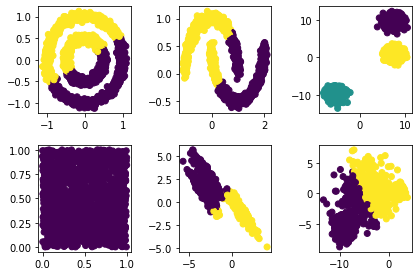

In [4]:
from sklearn.cluster import KMeans

fig, axes = plt.subplots(2, 3)
fig.tight_layout()
kmeans_a = KMeans(n_clusters=2, random_state=10).fit_predict(A)
axes[0,0].scatter(A[:,0],A[:,1], c=kmeans_a)
kmeans_b = KMeans(n_clusters=2, random_state=10).fit_predict(B)
axes[0,1].scatter(B[:,0],B[:,1], c=kmeans_b)
kmeans_c = KMeans(n_clusters=3, random_state=10).fit_predict(C)
axes[0,2].scatter(C[:,0],C[:,1], c=kmeans_c)
kmeans_d = KMeans(n_clusters=1, random_state=10).fit_predict(D)
axes[1,0].scatter(D[:,0],D[:,1], c=kmeans_d)
kmeans_e = KMeans(n_clusters=2, random_state=10).fit_predict(E)
axes[1,1].scatter(E[:,0],E[:,1], c=kmeans_e)
kmeans_f = KMeans(n_clusters=2, random_state=10).fit_predict(F)
axes[1,2].scatter(F[:,0],F[:,1], c=kmeans_f)

## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN


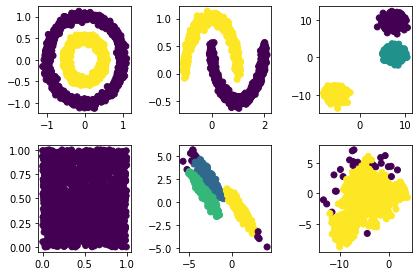

In [5]:
from sklearn.cluster import DBSCAN

fig, axes = plt.subplots(2, 3)
fig.tight_layout()
dbscan_a = DBSCAN(eps=0.1).fit_predict(A)
axes[0,0].scatter(A[:,0],A[:,1], c=dbscan_a)
dbscan_b = DBSCAN(eps=0.2).fit_predict(B)
axes[0,1].scatter(B[:,0],B[:,1], c=dbscan_b)
dbscan_c = DBSCAN(eps=2).fit_predict(C)
axes[0,2].scatter(C[:,0],C[:,1], c=dbscan_c)
dbscans_d = DBSCAN(eps=0.5).fit_predict(D)
axes[1,0].scatter(D[:,0],D[:,1], c=dbscans_d)
dbscan_e = DBSCAN(eps=0.35).fit_predict(E)
axes[1,1].scatter(E[:,0],E[:,1], c=dbscan_e)
dbscan_f = DBSCAN(eps=1).fit_predict(F)
axes[1,2].scatter(F[:,0],F[:,1], c=dbscan_f)